# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [2]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

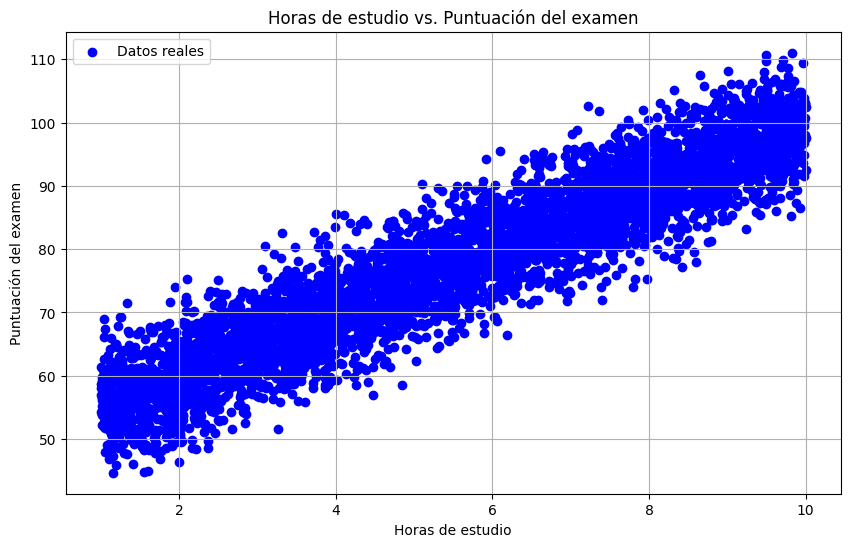

In [3]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST

# A COMPLETAR

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% train y val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento y validación en conjunto de entrenamiento y conjunto de validación (50% cada uno)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 3200
Datos de Validación: 800
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [5]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    # A COMPLETAR
    diferencia=y_true-y_pred
    cost=np.mean(diferencia ** 2)/len(y_true)
    return cost

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    train_loss_per_epoch=[]
    val_loss_per_epoch=[]

    # A COMPLETAR

    # 1. Inicializar los coeficientes (pesos) w y b
    w=np.random.rand()
    b=np.random.rand()
    # 2. bucle que itere por epoch

    for _ in range(epochs):

        # 3. Calcular y_pred del conjunto de entrenamiento por epoch
        y_pred = (X_train* w) + b

        # 4. Calcular las pérdidas de entrenamiento y almacenarlas en una lista por epoch [train_loss_per_epoch]
        train_loss = cost_function(y_train, y_pred)
        train_loss_per_epoch.append(train_loss)

        # 5. Calcular los gradientes para los pesos w y b
        # gradiente de b es la derivada de la función de coste con respecto a b: (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta]
        # gradiente de w es la derivada de la función de coste con respecto a w: (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta] * [carácterísticas de las muestras]
        train_error=y_pred-y_train
        w_derivative = (-2 / X_train.shape[0]) * np.sum((y_train-y_pred) * X_train)
        b_derivative = (-2 / X_train.shape[0]) * np.sum(y_train-y_pred)

        # 6. Actualizar los pesos w y b (que será el valor actual del peso menos el learning rate por el gradiente del peso)
        w = w - lr * w_derivative
        b = b - lr * b_derivative

        # 7. Calcular y_pred del conjunto de validación por epoch
        y_pred_val =(X_val* w) + b



        # 8. Calcular las pérdidas de validación y almacenarlas en una lista por epoch [val_loss_per_epoch]
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)

    return w, b, train_loss_per_epoch, val_loss_per_epoch


In [6]:
# Hiperparámetros
lr = 0.01
epochs = 1000

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)


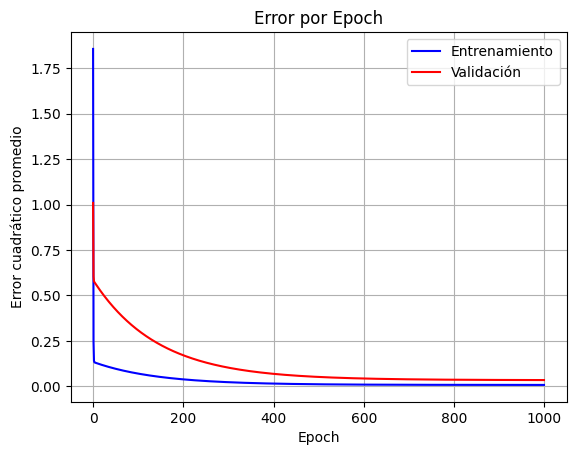

In [7]:
# Visualización del error de entrenamiento por epoch

plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, color='blue', label='Entrenamiento')
plt.plot(range(epochs), val_loss_per_epoch, color='red', label='Validación')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.legend()  # Mostrar leyenda con los nombres de las líneas
plt.grid(True)  # Mostrar la cuadrícula en el gráfico
plt.show()


Costo del modelo: 0.02586179089464361


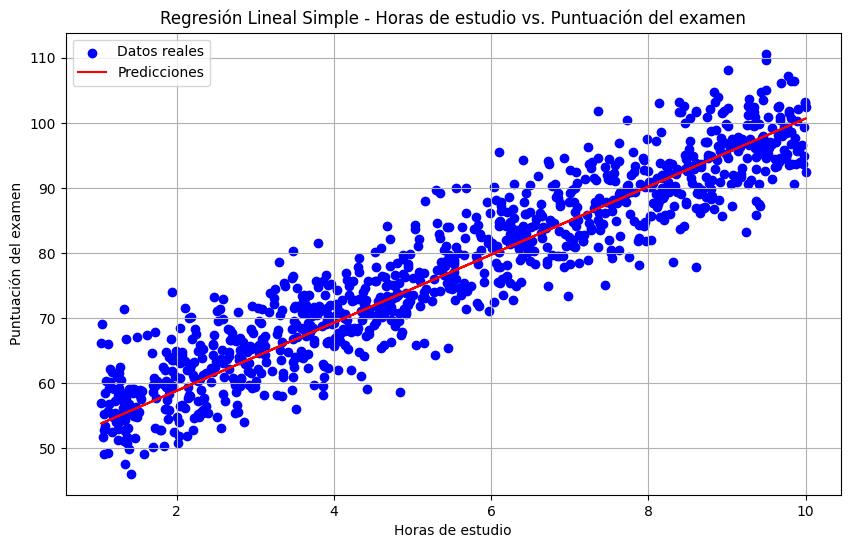

In [8]:
# Realizar predicciones en test
y_pred = (X_test * w) + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()



In [9]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 25.861790894643608
MAE en el conjunto de test: 4.005437595609835
R^2 en el conjunto de test: 0.8702502046368298
MAPE en el conjunto de test: 5.304678922363013


## Implementación de la regresión lineal usando sklearn

In [10]:
# Crear el modelo de regresión lineal con sklearn
from sklearn.linear_model import LinearRegression
# A COMPLETAR
model = LinearRegression()
# Entrenar el modelo con los datos de entrenamiento
# A COMPLETAR
# Entrenar el modelo con los datos de entrenamiento
X_train = X_train.reshape(-1, 1)
model.fit(X_train, y_train)




LinearRegression()

Costo del modelo: 25.252964425596577


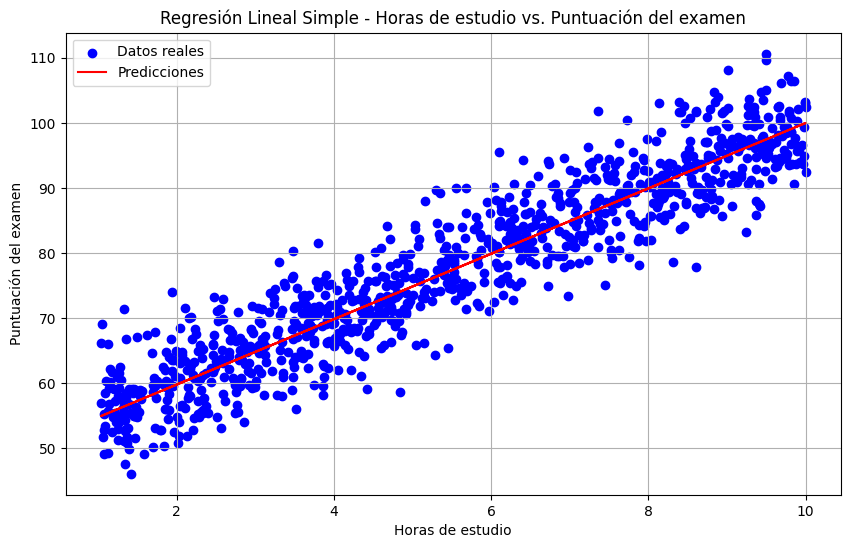

In [11]:
# Realizar predicciones en test
X_test=X_test.reshape(-1,1)
y_pred = model.predict(X_test)

# Calcular el costo
cost = mean_squared_error(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()




In [12]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
# Calcular las métricas de evaluación
mse1 = mean_squared_error(y_test, y_pred)
mae1 = mean_absolute_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)
mape1 = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE en el conjunto de entrenamiento:", mse1)
print("MAE en el conjunto de entrenamiento:", mae1)
print("R^2 en el conjunto de entrenamiento:", r21)
print("MAPE en el conjunto de entrenamiento:", mape1)

MSE en el conjunto de entrenamiento: 25.252964425596577
MAE en el conjunto de entrenamiento: 3.954905594471453
R^2 en el conjunto de entrenamiento: 0.8733047150569452
MAPE en el conjunto de entrenamiento: 5.258032401761509


## Comparación de parámetros obtenidos

In [13]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 48.37967005748506
Coeficiente de pendiente (w) - Manual: 5.229590229287417
Coeficiente de intercepción (b) - Scikit-learn: 49.7409163841056
Coeficiente de pendiente (w) - Scikit-learn: 5.024644665080553


En conclusión, la eficiencia y precisión del enfoque manual pueden variar dependiendo de la implementación y la precisión numérica. Es importante tener en cuenta que las implementaciones de bibliotecas como scikit-learn están optimizadas para ofrecer resultados precisos y eficientes.